# Desafio Etapa-2

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv("../etapa-1/csv_limpo.csv")

In [3]:
df

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,56,10353571.0,2023,2023
2,3,411000000.0,560622615.0,Madonna,Sticky Sweet Tour,85,4835294.0,2008,2009
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,156,2546795.0,2018,2019
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018
5,6,305158363.0,388978496.0,Madonna,The MDNA Tour,88,3467709.0,2012,2012
6,7,280000000.0,381932682.0,Celine Dion,Taking Chances World Tour,131,2137405.0,2008,2009
7,8,257600000.0,257600000.0,Pink,Summer Carnival,41,6282927.0,2023,2024
8,9,256084556.0,312258401.0,Beyoncé,The Formation World Tour,49,5226215.0,2016,2016
9,10,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85,2945882.0,2015,2015


## Questões

### Q1 - Qual é a artista que mais aparece nessa lista e possui a maior média de seu faturamento bruto (Actual gross)?

Fizemos de duas maneiras, utilizando a função `mean` e calculando a média manualmente. A resolução foi feita pegando o valor máximo de aparições das artistas na coluna 'Artist', somando os valores brutos adquiridos em cada turnê, que foram registrados na coluna 'Actual gross', e dividido pelo número de turnês de cada artista (que é essencialmente o que a função `mean` está fazendo junto a função `groupby`.)

Com a ajuda da função `mean`

In [4]:
q1_aux = df.groupby('Artist').filter(lambda x: len(x) == df['Artist'].value_counts().max())
q1_aux2 = q1_aux.groupby('Artist')['Actual gross'].mean().reset_index()
q1 = q1_aux2.sort_values('Actual gross', ascending=False).head(1)

q1

,Artist,Actual gross
1,Taylor Swift,381518786.5


Calculando manualmente

In [5]:
q1_aux2 = q1_aux.groupby('Artist').agg(total_gross=('Actual gross', 'sum'), turnes=('Actual gross', 'count')).reset_index()
q1_aux2['media'] = q1_aux2['total_gross'] / q1_aux2['turnes']
q1 = q1_aux2.sort_values('media', ascending=False).head(1).drop(columns=['total_gross', 'turnes'])

q1

,Artist,media
1,Taylor Swift,381518786.5


encadeamento

In [6]:
q1 = (
    df.groupby('Artist')
    .filter(lambda x: len(x) == df['Artist'].value_counts().max())
    .groupby('Artist')['Actual gross']
    .mean()
    .reset_index()
    .sort_values('Actual gross', ascending=False)
    .head(1)
    .iloc[0]['Artist']
)

q1

'Taylor Swift'

### Q2 - Das turnês que aconteceram dentro de um ano, qual a turnê com a maior média de faturamento bruto (Average Gross)

Separamos as turnês que aconteceram dentro de um ano igualando as colunas de **'Start year'** e **'End year'** e usamos a função `nlargest` para pegar o maior valor da coluna **'Average gross'**, e por último selecionamos o valor da coluna **'Tour title'**.

In [7]:
# q2_aux = df[df['Start year'] == df['End year']]
q2 = df.query('`Start year` == `End year`').nlargest(1, 'Average gross')

q2['Tour title']

1    Renaissance World Tour
Name: Tour title, dtype: object

encadeamento

In [8]:
q2 = (
    df[df['Start year'] == df['End year']]
    .nlargest(1, 'Average gross')
    .iloc[0]['Tour title']
)

q2

'Renaissance World Tour'

### Q3 - Quais são as 3 turnês que possuem o show (unitário) mais lucrativo? Cite também o nome de cada artista e o valor por show. Utilize a coluna "Adjusted gross (in 2022 dollars)". Caso necessário, crie uma coluna nova para essa conta.

Foi criada uma nova coluna chamada **'show_unitario"** calculada à partir da divisão da coluna **'Adjusted gross (in 2022 dollars)'** pela coluna **'Shows'**, em seguida os valores resultantes foram organizados em ordem decrescente e foram separados os top 3 casos. renomeamos a coluna **'show_unitario'** para **'Show unitario'** (não conseguimos fazer direto porque a função `assign` não havia aceitado esse nome separado ou entre aspas). Resetamos o index apenas para a criação do novo dataframe.

In [9]:
df['Show unitario'] = df['Adjusted gross (in 2022 dollars)'] / df['Shows']
q3_aux = df.sort_values('Show unitario', ascending=False).head(3)
q3_aux_2 = q3_aux[['Tour title', 'Artist', 'Show unitario']]

q3_aux_2

,Tour title,Artist,Show unitario
0,The Eras Tour,Taylor Swift,1.392857e+07
1,Renaissance World Tour,Beyoncé,1.035357e+07
4,Reputation Stadium Tour,Taylor Swift,7.600846e+06


encadeamento

In [10]:
q3 = (
    df.assign(show_unitario = df['Adjusted gross (in 2022 dollars)'] / df['Shows'])
    .sort_values('show_unitario', ascending=False)
    .head(3)
    [['Artist', 'Tour title', 'show_unitario']]
    .rename(columns={'show_unitario': 'Show unitario'})
    .reset_index(drop=True)
)

q3

,Artist,Tour title,Show unitario
0,Taylor Swift,The Eras Tour,1.392857e+07
1,Beyoncé,Renaissance World Tour,1.035357e+07
2,Taylor Swift,Reputation Stadium Tour,7.600846e+06


### Q4 - Para a artista que mais aparece nessa lista e que tenha o maior somatório de faturamento bruto, crie um gráfico de linhas que mostra o faturamento por ano da turnê (use a coluna Start Year). Apenas os anos com turnês.

Como já sabíamos de antemão quem era a arista com o maior somatório de faturamento bruto, selecionamos ela para fazer uma comparação com o nosso código. Caso a nossa tabela seja atualizada e outra artista venha a ser aquela que mais aparece na lista e que tenha o maior somatório de faturamento bruto, nosso código **PRECISA** capturar essa mudança. Para isso filtramos com uma função lambda e as funções `value_counts` e `max` (que pegou o valor máximo da contagem de valores filtrados na coluna **'Artist'**) os artistas que mais aparecem na lista. O gráfico requisitado para a questão foi um gráfico de linha plotado com a função `lineplot` da biblioteca seaborn e as funções de matplotlib para ajustar o título, os eixos x e y, usamos a função `gca` para ajustar os valores do eixo y de forma que fique mais legível e em dólares americanos.

In [11]:
df.loc[df['Artist'] == 'Taylor Swift']

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year,Show unitario
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024,1.392857e+07
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018,7.600846e+06
9,10,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85,2945882.0,2015,2015,3.636963e+06
19,20,150000000.0,185423109.0,Taylor Swift,The Red Tour,86,1744186.0,2013,2014,2.156083e+06


In [12]:
q4_aux = df.groupby('Artist').filter(lambda x: len(x) == df['Artist'].value_counts().max())
q4_aux2 = q4_aux.groupby('Artist')['Actual gross'].sum().idxmax()
q4 = df[df['Artist'] == q4_aux2]

q4

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year,Show unitario
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024,1.392857e+07
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018,7.600846e+06
9,10,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85,2945882.0,2015,2015,3.636963e+06
19,20,150000000.0,185423109.0,Taylor Swift,The Red Tour,86,1744186.0,2013,2014,2.156083e+06


Encadeamento

In [13]:
q4 = (
    df
    .groupby('Artist')
    .filter(lambda x: len(x) == df['Artist'].value_counts().max())
    .groupby('Artist')['Actual gross']
    .sum()
    .pipe(lambda x: df[df['Artist'] == x.idxmax()])
)

q4

,Rank,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Shows,Average gross,Start year,End year,Show unitario
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour,56,13928571.0,2023,2024,1.392857e+07
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,53,6522173.0,2018,2018,7.600846e+06
9,10,250400000.0,309141878.0,Taylor Swift,The 1989 World Tour,85,2945882.0,2015,2015,3.636963e+06
19,20,150000000.0,185423109.0,Taylor Swift,The Red Tour,86,1744186.0,2013,2014,2.156083e+06


gráfico de linha

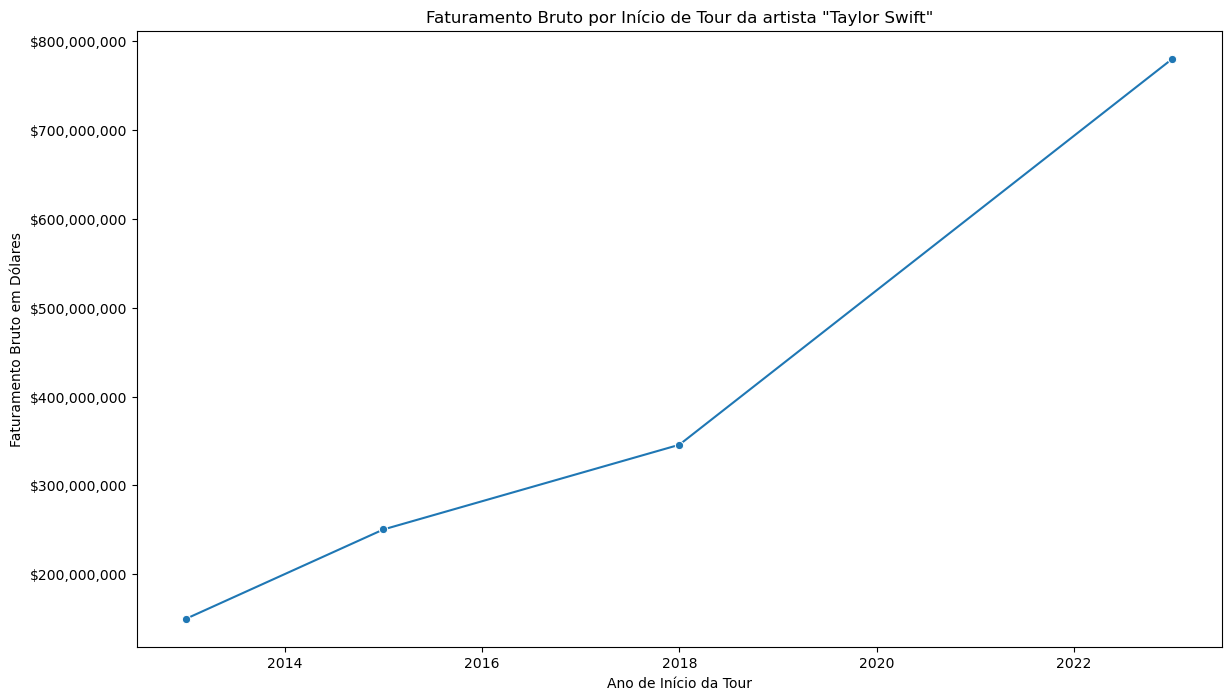

In [14]:
plt.figure(figsize=(14, 8))

sns.lineplot(data=q4, x='Start year', y='Actual gross', marker='o')
plt.title(f'Faturamento Bruto por Início de Tour da artista "{q4["Artist"].iloc[0]}"')
plt.xlabel('Ano de Início da Tour')
plt.ylabel('Faturamento Bruto em Dólares')
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

plt.show()

### Q5 - Faça um gráfico de colunas demonstrando as 5 artistas com mais shows na lista.

Simplesmente agrupamos o shows por artistas, organizamos os valores por ordem ascendente e guardamos apenas as top 5 artistas com mais shows realizados. Plotamos um gráfico em barras horizontais com a função `barplot` do seaborn e ajustamos o título, os eixos x e y com as funções do matplotlib.

In [15]:
q5_aux = df.groupby('Artist')['Shows'].sum().sort_values(ascending=False)
q5 = q5_aux.head(5)
q5

Artist
Pink            339
Cher            325
Madonna         315
Lady Gaga       301
Taylor Swift    280
Name: Shows, dtype: int64

Encadeamento

In [16]:
q5 = (
    df
    .groupby('Artist')['Shows']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

q5

,Artist,Shows
0,Pink,339
1,Cher,325
2,Madonna,315
3,Lady Gaga,301
4,Taylor Swift,280


gráfico de barras horizontais

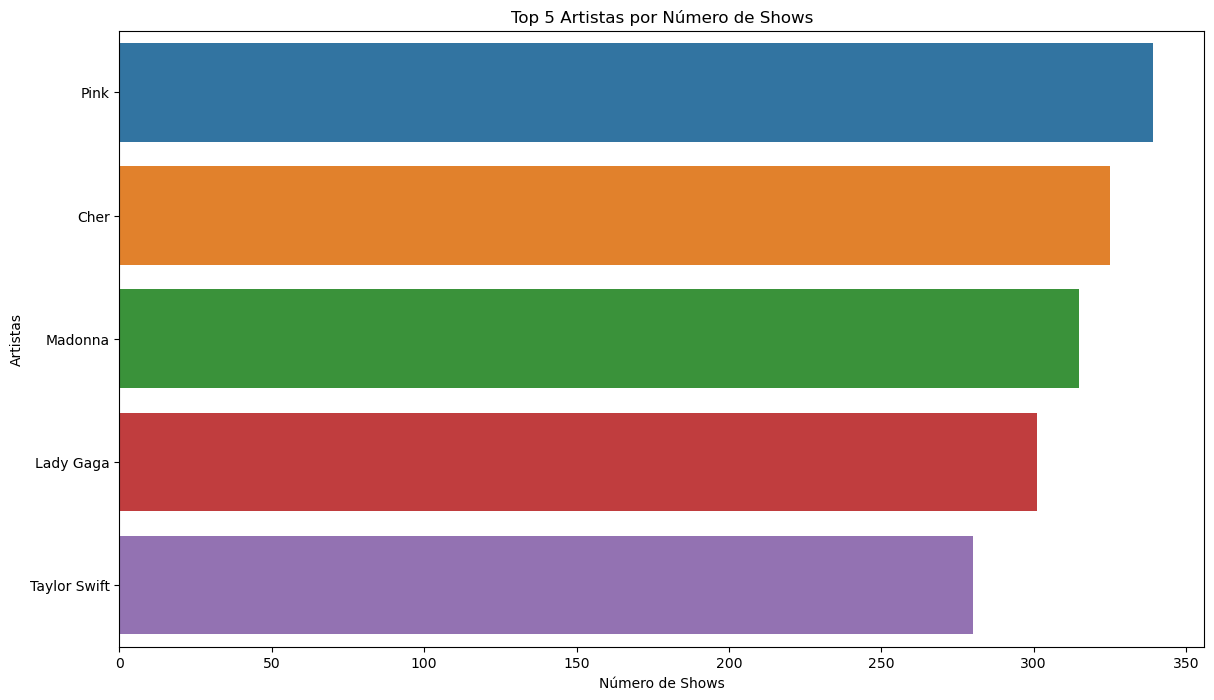

In [17]:
plt.figure(figsize=(14, 8))

sns.barplot(data=q5, x='Shows', y='Artist', hue='Artist')
plt.title('Top 5 Artistas por Número de Shows')
plt.xlabel('Número de Shows')
plt.ylabel('Artistas')
plt.show()